<a href="https://colab.research.google.com/github/DonOfDigitalWorld/Ensemble_models/blob/main/Gradient_Boost_Regressor_and_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
train_data= pd.read_csv("/content/sample_data/train.csv")
test_data= pd.read_csv("/content/sample_data/test.csv")

In [9]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
y_train = train_data['Survived']
train_data.drop(labels="Survived",axis=1,inplace=True)

In [13]:
full_data = train_data.append(test_data)

In [14]:
full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
drop_columns = ["Name","Age","SibSp","Ticket","Cabin","Parch","Embarked"]
full_data.drop(labels=drop_columns,axis=1,inplace=True)

In [16]:
full_data.head()

,PassengerId,Pclass,Sex,Fare
0,1,3,male,7.2500
1,2,1,female,71.2833
2,3,3,female,7.9250
3,4,1,female,53.1000
4,5,3,male,8.0500


In [17]:
full_data = pd.get_dummies(full_data,columns=["Sex"])
full_data.fillna(value=0.0,inplace=True)

In [18]:
X_train = full_data.values[0:891]
X_test = full_data.values[891:]

In [19]:
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [20]:
state=12
test_size =0.30

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=state)

In [21]:
lr_list = [0.05,0.075,0.1,0.25,0.5,0.75,1]

In [24]:
for learning_rate in lr_list:
  gb_clf = GradientBoostingClassifier(n_estimators=20,learning_rate=learning_rate,max_features=2,max_depth=2,random_state=0)
  gb_clf.fit(X_train, y_train)

  print("Learning rate: ", learning_rate)
  print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
  print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.801
Accuracy score (validation): 0.731
Learning rate:  0.075
Accuracy score (training): 0.814
Accuracy score (validation): 0.731
Learning rate:  0.1
Accuracy score (training): 0.812
Accuracy score (validation): 0.724
Learning rate:  0.25
Accuracy score (training): 0.835
Accuracy score (validation): 0.750
Learning rate:  0.5
Accuracy score (training): 0.864
Accuracy score (validation): 0.772
Learning rate:  0.75
Accuracy score (training): 0.875
Accuracy score (validation): 0.754
Learning rate:  1
Accuracy score (training): 0.875
Accuracy score (validation): 0.739


In [32]:
lr = np.linspace(0.1,1)

In [34]:
for learning_rate in lr:
  gb_clf = GradientBoostingClassifier(n_estimators=20,learning_rate=learning_rate,max_features=2,max_depth=2,random_state=0)
  gb_clf.fit(X_train, y_train)

  print("Learning rate: ", learning_rate)
  # print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
  print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.1
Accuracy score (validation): 0.724
Learning rate:  0.11836734693877551
Accuracy score (validation): 0.720
Learning rate:  0.13673469387755102
Accuracy score (validation): 0.728
Learning rate:  0.15510204081632656
Accuracy score (validation): 0.728
Learning rate:  0.17346938775510207
Accuracy score (validation): 0.746
Learning rate:  0.19183673469387758
Accuracy score (validation): 0.750
Learning rate:  0.21020408163265308
Accuracy score (validation): 0.757
Learning rate:  0.2285714285714286
Accuracy score (validation): 0.761
Learning rate:  0.2469387755102041
Accuracy score (validation): 0.761
Learning rate:  0.2653061224489796
Accuracy score (validation): 0.761
Learning rate:  0.2836734693877551
Accuracy score (validation): 0.757
Learning rate:  0.3020408163265306
Accuracy score (validation): 0.757
Learning rate:  0.3204081632653062
Accuracy score (validation): 0.769
Learning rate:  0.3387755102040817
Accuracy score (validation): 0.784
Learning rate:  0.35714285714

In [37]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20,learning_rate=0.7612244897959184,max_depth=2,random_state=0)
gb_clf2.fit(X_train,y_train)
predictions = gb_clf2.predict(X_val)

In [40]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))
cf_matrix = confusion_matrix(y_val, predictions)

Confusion Matrix:
[[139  22]
 [ 43  64]]


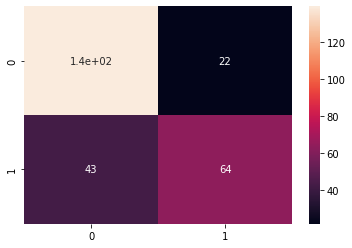

In [41]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [39]:
print("Classification Report")
print(classification_report(y_val, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       161
           1       0.74      0.60      0.66       107

    accuracy                           0.76       268
   macro avg       0.75      0.73      0.74       268
weighted avg       0.76      0.76      0.75       268



In [42]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [43]:
bhp = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(bhp.data, bhp.target, random_state=42, test_size=0.1)

In [46]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [47]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [48]:
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train_std, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


GradientBoostingRegressor(learning_rate=0.01, loss='ls', min_samples_split=5,
                          n_estimators=1000)

In [49]:
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))

Model Accuracy: 0.918


In [50]:
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 5.1387
